## Predicting Fuel Efficiency:

### 1-Load the data as a Pandas data frame:


In [72]:
# import pandas library
import pandas as pd

# load data as a pandas dataframe
df = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\DSC550 Datasets\auto-mpg.csv")

# display the first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 2 - Prepping the data for modeling:


In [73]:
# Remove the car name column.
df = df.drop('car name', axis=1)

# Check if the column 'car name' is removed
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [74]:
# show the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [75]:
# display the possible entries in the 'horsepower' column 
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

The column 'horsepower' is imported as a string data type, because it includes entries of a string object which is a question  mark ('?'). 

We are going then to replace these strings with the column mean.

In [76]:
# import numpy library
import numpy as np

# replace the string in 'horsepower' column with nan
df['horsepower']= df['horsepower'].replace('?', np.nan)

# change the data type of the column 'horsepower' to float
df['horsepower'] = df['horsepower'].astype('float64')


In [77]:
# replace nan values with 'horsepower' column mean
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [78]:
# Create dummy variables for the origin column.
df_dummies = pd.get_dummies(df, columns=['origin'], drop_first = True)

print(df_dummies)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin_2  origin_3  
0            70     False     False  
1            70     False     False  
2            70     F

In [79]:
# convert the boolean to integers
df_dummies[['origin_2', 'origin_3']] = df_dummies[['origin_2', 'origin_3']].astype(int)

print(df_dummies)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin_2  origin_3  
0            70         0         0  
1            70         0         0  
2            70      

### 3 - Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?



In [83]:
# create a correlation matrix
correlation_matrix = df_dummies.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.024489,0.193101
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.229895,1.000000


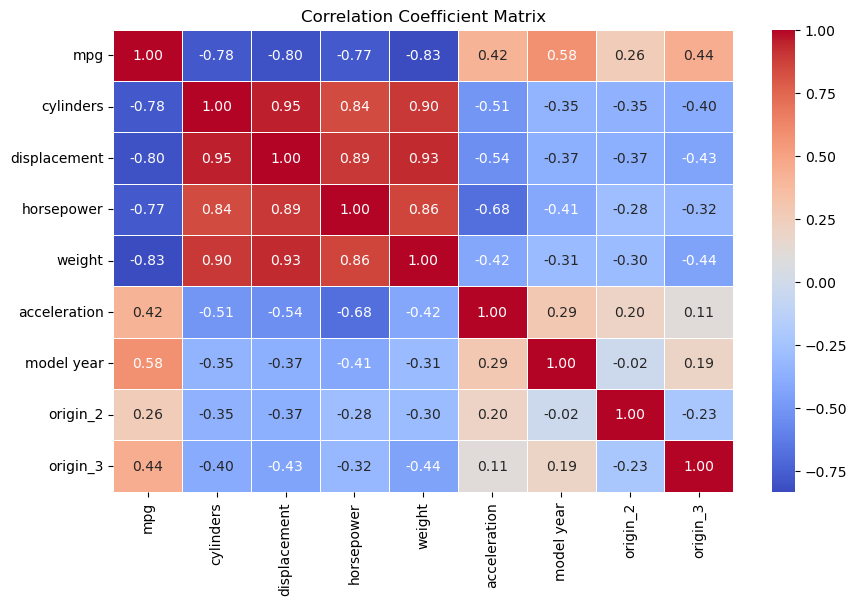

In [84]:
# import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap ='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Coefficient Matrix')
plt.show()


Cylinders, horsepower, Weight and Displacement are highly negatively correlated with mpg.That means as the number of cylinders , the horsepower, the weight or the displacement of the car increases, the mpg(fuel efficiency) decreases significantly.

### 4 - Plot mpg versus weight:

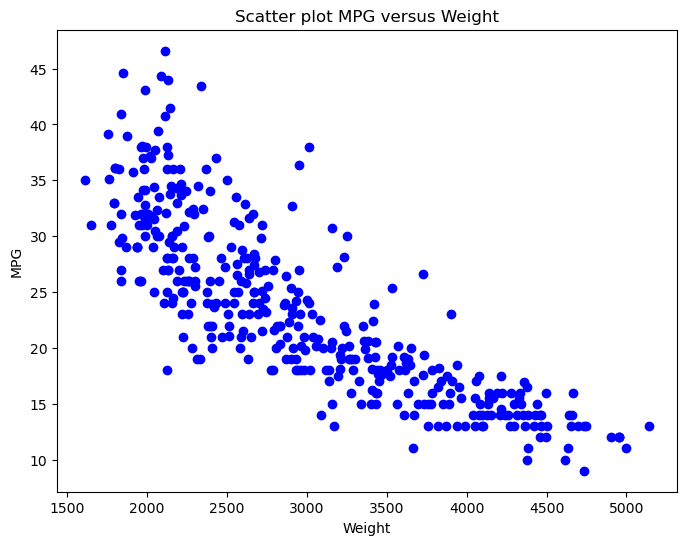

In [85]:
# create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['weight'], df['mpg'], marker='o', color='blue')
plt.title('Scatter plot MPG versus Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

The plot highlights the relationship between the fuel efficiency (mpg) and the weight of the car (weight). The two variables are negatively correlated. As the weight of the car increases, its fuel efficiency decreases. This plot confirms our findings in the previous question (Correlation coefficient = -0.83).

### 5 - Randomly split the data into 80% training data and 20% test data, where your target is mpg:

In [86]:
# define features and target variable
X = df.drop(columns=['mpg']) # features
y = df['mpg']  # target variable

In [87]:
# import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# print training and testing sets shape
print('Training Set Shape:', X_train.shape, y_train.shape)
print('Testing Set Shape:', X_test.shape, y_test.shape)

Training Set Shape: (318, 7) (318,)
Testing Set Shape: (80, 7) (80,)


### 6 - Train an ordinary linear regression on the training data:

In [52]:
# import the LinearRegression class from sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

### 7 - Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results:

In [89]:
# import mean_squared_error, mean_absolute_error, r2_score key functions from sklearn.metrics module
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
# Make predictions in the training set
y_train_pred = model.predict(X_train)

#Make predictions on the testing set
y_test_pred = model.predict(X_test)

# calculate metrics for the training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# calculate metrics for the testing set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# print the results
print('Training Set Metrics:')
print('R2:', r2_train)
print('RMSE:', rmse_train)
print('MAE:', mae_train)


print('\nTesting Set Metrics:')
print('R2:', r2_test)
print('RMSE:', rmse_test)
print('MAE:', mae_test)

Training Set Metrics:
R2: 0.813954121383177
RMSE: 3.415314596555291
MAE: 2.5992773669757963

Testing Set Metrics:
R2: 0.8475731044779432
RMSE: 2.862770005444691
MAE: 2.2533884059317613


- The R² values indicate that the model explains 81.4% of the variance in the target variable (mpg) in the training set and 84.8% of the variance in the test set. This suggests that the model performs well, particularly in predicting unseen data. 

- The RMSE values show that, on average, the model's predictions are off by 3.42 units of mpg in the training data and 2.86 units in the test data. Interestingly, the model performs slightly better on the test set, which is a good indicator that it is not overfitting. 

- Similarly, the MAE values reveal that the average absolute difference between actual and predicted values is 2.60 units in the training set and 2.25 units in the test set, confirming that the model's predictions on the test data are more accurate than those on the training data. 

Overall, These results suggest that the model (linear regression model) is robust. It performs well with good fit on the training and testing sets. The R2 is highly significant and the errors are relatively small. It is reliable in making predictions on new data.


### 8 - Pick another regression model and repeat the previous two steps:

Let's go to the Ridge regression which is a regularized version of linear regression.

In [91]:
# import Ridge class from sklearn.linear_model
from sklearn.linear_model import Ridge

# create the model
ridge_model = Ridge(alpha=1.0)

# train the model on the training data
ridge_model.fit(X_train, y_train)


Ridge()

In [92]:
# Make predictions in the training set
y_train_pred_ridge = ridge_model.predict(X_train)

#Make predictions on the testing set
y_test_pred_ridge = ridge_model.predict(X_test)

# calculate metrics for the training set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)

# calculate metrics for the testing set
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

# print the results
print('Training Set Metrics for Ridge Regression model:')
print('R2:', r2_train_ridge)
print('RMSE:', rmse_train_ridge)
print('MAE:', mae_train_ridge)


print('\nTesting Set Metrics Ridge Regression model:')
print('R2:', r2_test_ridge)
print('RMSE:', rmse_test_ridge)
print('MAE:', mae_test_ridge)

Training Set Metrics for Ridge Regression model:
R2: 0.8139533417599624
RMSE: 3.4153217524669808
MAE: 2.59927537090866

Testing Set Metrics Ridge Regression model:
R2: 0.8474762928861581
RMSE: 2.8636789832447795
MAE: 2.253852126845753


The results of training and test sets metrics are very similar to the matrics of the linear regression model. We can assume that the two models are performing well with good fit on the training and testing sets.